# Week 5 - Mini-Project

## <font color='#1A9FFF'>Case study: Camera Property</font>

We have a dataset of about 1000 cameras with 13 properties such as weight, focal length, price, etc. These cameras belong to 12 companys such as Canon, HP, Sony, etc, each company is represented by a code, refer to the first column of the dataset.

**The project aims to:**
* For each company/camera series, what is the trend of  different properties over time?
* For all cameras released, what is the trend of different properties over time?
* Compare the properties of cameras produced by different companies.
* Compare the properties of cameras produced by different companies in some years.

## <font color='#1A9FFF'>Sample Solution</font>
#### Import Libraries and Dataset

In [1]:
import numpy  as np
import pandas as pd              # import pandas for data wrangling
import matplotlib.pyplot as plt  # import matplotlib for ploting
%matplotlib inline


# read camera dataset
camera = pd.read_csv('Camera.csv')   # read data

camera.head()

,Company Code,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1,Canon PowerShot 350,1997,640,0,0,42,42,70,3.0,2.0,320.0,93.0,149
1,1,Canon PowerShot 600,1996,832,640,0,50,50,40,10.0,1.0,460.0,160.0,139
2,1,Canon PowerShot A10,2001,1280,1024,1,35,105,76,16.0,8.0,375.0,110.0,139
3,1,Canon PowerShot A100,2002,1280,1024,1,39,39,20,5.0,8.0,225.0,110.0,139
4,1,Canon PowerShot A20,2001,1600,1024,1,35,105,76,16.0,8.0,375.0,110.0,139


###  <font color='#1A9FFF'>1. Brief Summary of Dataset</font>
After reading in the data, we first do some simple exploration, check available columns, data structure, and data summary.

#### Check the size of the dataset

In [2]:
# Check the size of the camera datasets
print ("The size of the Camera dataset :", camera.shape)

The size of the Camera dataset : (956, 14)


As we can see, there are `956` camera models recored in this camera datasets, and each model has `14` attributes

#### Check the data structure 

In [3]:
# Check the data structure
print ("Data structure - Camera :\n\n", camera.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
Company Code               956 non-null int64
Model                      956 non-null object
Release date               956 non-null int64
Max resolution             956 non-null int64
Low resolution             956 non-null int64
Effective pixels           956 non-null int64
Zoom wide (W)              956 non-null int64
Zoom tele (T)              956 non-null int64
Normal focus range         956 non-null int64
Macro focus range          955 non-null float64
Storage included           954 non-null float64
Weight (inc. batteries)    954 non-null float64
Dimensions                 954 non-null float64
Price                      956 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 104.6+ KB
Data structure - Camera :

 None


From the dataset check we can see that, there are missing data in the involved datasets. The related attributes are `"Macro Focus Range"`, `"Stroage Included"`, `"Weight"`, `"Dimensions"`.

#### Check attributes

In [4]:
# Check the main attributes of the first 10 cameras

camera10 = camera.head(10)
print ("Brief data check :\n\n", camera10)

Brief data check :

    Company Code                 Model  Release date  Max resolution  \
0             1   Canon PowerShot 350          1997             640   
1             1   Canon PowerShot 600          1996             832   
2             1   Canon PowerShot A10          2001            1280   
3             1  Canon PowerShot A100          2002            1280   
4             1   Canon PowerShot A20          2001            1600   
5             1  Canon PowerShot A200          2002            1600   
6             1   Canon PowerShot A30          2002            1280   
7             1  Canon PowerShot A300          2003            2048   
8             1  Canon PowerShot A310          2004            2048   
9             1   Canon PowerShot A40          2002            1600   

   Low resolution  Effective pixels  Zoom wide (W)  Zoom tele (T)  \
0               0                 0             42             42   
1             640                 0             50         

#### Brief Summary

In [5]:
# Briefly summarize the distribution of the attributes
camera.describe()

,Company Code,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,955.000000,954.000000,954.000000,954.000000,956.000000
mean,6.196653,2003.770921,2514.155858,1820.148536,4.746862,32.939331,124.119247,43.805439,7.597906,18.020964,321.719078,105.885220,455.941423
std,3.532798,2.675237,751.369793,825.524852,2.844070,10.286599,94.851410,24.067266,8.066261,28.373716,265.760906,22.454166,767.195789
min,1.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000
25%,3.000000,2002.000000,2048.000000,1280.000000,3.000000,35.000000,100.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,6.000000,2004.000000,2576.000000,2048.000000,5.000000,36.000000,110.000000,50.000000,6.000000,16.000000,225.000000,101.000000,199.000000
75%,9.000000,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,22.000000,350.000000,114.000000,399.000000
max,12.000000,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


###  <font color='#1A9FFF'>2. Check the Data</font>
Check the data to see whether there is any wrong data in the dataset.

As we can see from the Brief Summary, the data listed is in good shape. Therefore we do not perform any data checking here.

###  <font color='#1A9FFF'>3. Data Observation</font>
#### Campany Distribution

The .csv dataset doesn't show the company name that corresponds to the `Company Code`. Please refer the table below:

| Company Name | Company Code |
|:------------:|:------------:|
| canon | 1 |
| casio | 2 |
| fujifilm | 3 |
| hp | 4 |
| kodak | 5 |
| nikon | 6 |
| olympus | 7 |
| panasonic | 8 |
| pentax | 9 |
| ricoh | 10 |
| samsung | 11 |
| sony | 12 |

In [6]:
# get data of 12 companies
cam_canon = camera[ camera['Company Code'] == 1 ].copy()
cam_casio = camera[ camera['Company Code'] == 2 ].copy()
cam_fujif = camera[ camera['Company Code'] == 3 ].copy()
cam_hp    = camera[ camera['Company Code'] == 4 ].copy()
cam_kodak = camera[ camera['Company Code'] == 5 ].copy()
cam_nikon = camera[ camera['Company Code'] == 6 ].copy()
cam_olymp = camera[ camera['Company Code'] == 7 ].copy()
cam_panas = camera[ camera['Company Code'] == 8 ].copy()
cam_penta = camera[ camera['Company Code'] == 9 ].copy()
cam_ricoh = camera[ camera['Company Code'] == 10 ].copy()
cam_samsu = camera[ camera['Company Code'] == 11 ].copy()
cam_sony  = camera[ camera['Company Code'] == 12 ].copy()


# get the number of camera models of each company
s_canon = cam_canon.shape[0]
s_casio = cam_casio.shape[0]
s_fujif = cam_fujif.shape[0]
s_hp    = cam_hp.shape[0]
s_kodak = cam_kodak.shape[0]
s_nikon = cam_nikon.shape[0]
s_olymp = cam_olymp.shape[0]
s_panas = cam_panas.shape[0]
s_penta = cam_penta.shape[0]
s_ricoh = cam_ricoh.shape[0]
s_samsu = cam_samsu.shape[0]
s_sony  = cam_sony.shape[0]



# create a dictionary recording the number of models of each company
dictionary = {
              'Company' : pd.Series(['Canon', 'Casio', 'FujiFilm', 'HP', 'Kodak', 'Nikon', 'Olympus', 'Panasonic', 'Pentax', 'Ricoh', 'Samsung', 'Sony']),
              'Size'    : pd.Series([s_canon,  s_casio, s_fujif,    s_hp, s_kodak, s_nikon, s_olymp,   s_panas,     s_penta,  s_ricoh, s_samsu,   s_sony]), 
             }
df_s = pd.DataFrame(dictionary)
df_s

,Company,Size
0,Canon,115
1,Casio,63
2,FujiFilm,99
3,HP,46
4,Kodak,102
5,Nikon,90
6,Olympus,122
7,Panasonic,55
8,Pentax,68
9,Ricoh,26


###  <font color='#1A9FFF'>4. Exploratory Data Analysis</font>

#### Check the trend of produce over time for different companies

Release date
1996     1
1997     1
1998     2
1999     3
2000     4
2001     9
2002    11
2003    11
2004    19
2005    17
2006    18
2007    19
dtype: int64


Text(0.5, 1.0, 'Trend of Canon')

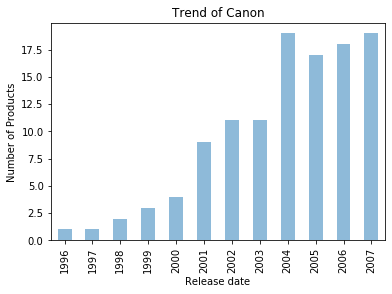

In [7]:
# Trend of product of Canon
trend_canon = cam_canon.groupby('Release date').size()
print (trend_canon)


# draw bar plot
trend_canon.plot.bar(alpha=0.5)
plt.ylabel('Number of Products')
plt.title('Trend of Canon')

Release date
1996     2
1997     2
1998     3
1999     6
2000    10
2001    10
2002     8
2003     9
2004    13
2005    19
2006    20
2007    20
dtype: int64


Text(0.5, 1.0, 'Trend of Olympus')

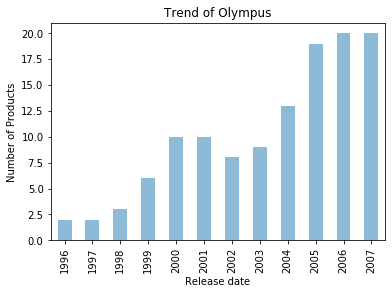

In [8]:
# Trend of product of Olympus
trend_olymp = cam_olymp.groupby('Release date').size()
print (trend_olymp)


# draw bar plot
trend_olymp.plot.bar(alpha=0.5)
plt.ylabel('Number of Products')
plt.title('Trend of Olympus')

Release date
1998     4
1999     6
2000    10
2001    14
2002    13
2003    15
2004    12
2005    14
2006    12
2007    16
dtype: int64


Text(0.5, 1.0, 'Trend of Sony')

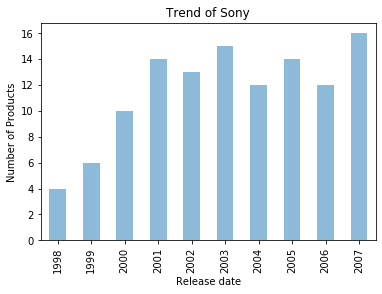

In [9]:
# Trend of product of Sony
trend_sony = cam_sony.groupby('Release date').size()
print (trend_sony)


# draw bar plot
trend_sony.plot.bar(alpha=0.5)
plt.ylabel('Number of Products')
plt.title('Trend of Sony')

**Observation**: The trend of (mean) number of products released for different companies is increasing over the years.

#### Check the trend of price over time for different companies

Release date
1998    1086.500000
1999     820.666667
2000     705.000000
2001     742.571429
2002     636.692308
2003     444.333333
2004     354.000000
2005     320.428571
2006     316.500000
2007     362.125000
Name: Price, dtype: float64


Text(0.5, 1.0, 'Trend of Price of Sony')

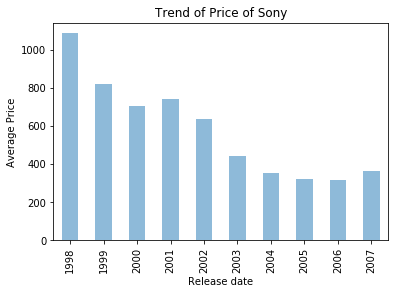

In [10]:
# Trend of prices of Sony
trend_price_sony = cam_sony.groupby('Release date')['Price'].mean()
print (trend_price_sony)


# draw bar plot
trend_price_sony.plot.bar(alpha=0.5)
plt.ylabel('Average Price')
plt.title('Trend of Price of Sony')

Release date
1997    169.000000
1998    169.000000
1999    171.857143
2000    387.571429
2001    172.000000
2002    464.833333
2003    187.000000
2004    385.000000
2005    189.000000
2006    312.846154
2007    331.307692
Name: Price, dtype: float64


Text(0.5, 1.0, 'Trend of Price of FujiFilm')

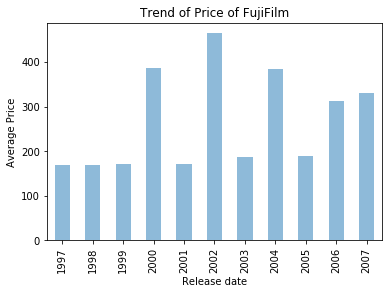

In [11]:
# Trend of prices of FujiFile
trend_price_fujif = cam_fujif.groupby('Release date')['Price'].mean()
print (trend_price_fujif)


# draw bar plot
trend_price_fujif.plot.bar(alpha=0.5)
plt.ylabel('Average Price')
plt.title('Trend of Price of FujiFilm')

Release date
2002    246.500000
2003    229.000000
2004    239.769231
2005    239.000000
2006    244.714286
2007    159.952381
Name: Price, dtype: float64


Text(0.5, 1.0, 'Trend of Price of Samsung')

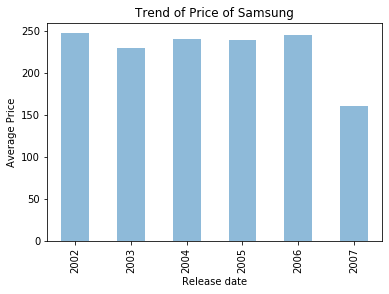

In [12]:
# Trend of prices of Samsung
trend_price_samsung = cam_samsu.groupby('Release date')['Price'].mean()
print (trend_price_samsung)


# draw bar plot
trend_price_samsung.plot.bar(alpha=0.5)
plt.ylabel('Average Price')
plt.title('Trend of Price of Samsung')

**Observation**: The trend of (mean) price for different companies are different. For some companies, the price was decreasing. For some others, the (mean) price fluctuated over time.

### Check the trend of some other properties over time for different companies

Release date
1994    1524.000000
1995    3060.000000
1998    1611.428571
1999    1716.444444
2000    1720.000000
2001    1825.000000
2002    2336.000000
2003    2069.625000
2004    2562.538462
2005    2549.066667
2006    2862.230769
2007    3191.076923
Name: Max resolution, dtype: float64


Text(0.5, 1.0, 'Trend of Max Resolution of Kodak')

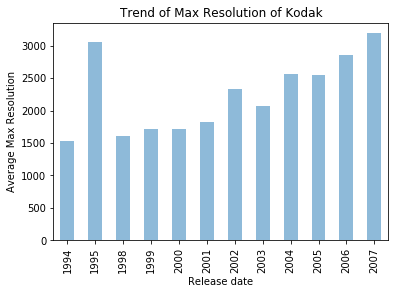

In [13]:
# Trend of Max Resolution of Kodak
trend_maxr_kodak = cam_kodak.groupby('Release date')['Max resolution'].mean()
print (trend_maxr_kodak)


# draw bar plot
trend_maxr_kodak.plot.bar(alpha=0.5)
plt.ylabel('Average Max Resolution')
plt.title('Trend of Max Resolution of Kodak')

Release date
1997     576.000000
1998    1194.666667
1999    1700.000000
2000    2048.000000
2001    2210.666667
2002    2198.857143
2003    2128.000000
2004    2743.272727
2005    2841.000000
2006    3040.000000
2007    3344.000000
Name: Max resolution, dtype: float64


Text(0.5, 1.0, 'Trend of Max Resolution of Nikon')

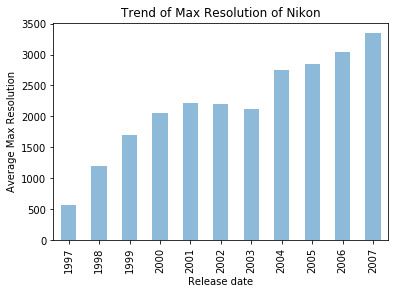

In [16]:
# Trend of Max Resolution of Nikon
trend_maxr_nikon = cam_nikon.groupby('Release date')['Max resolution'].mean()
print (trend_maxr_nikon)


# draw bar plot
trend_maxr_nikon.plot.bar(alpha=0.5)
plt.ylabel('Average Max Resolution')
plt.title('Trend of Max Resolution of Nikon')

Release date
1994      0.000000
1995      0.000000
1998     38.571429
1999     56.000000
2000     48.666667
2001     39.000000
2002     68.500000
2003    142.125000
2004    105.769231
2005    163.333333
2006    227.000000
2007    144.076923
Name: Zoom tele (T), dtype: float64


Text(0.5, 1.0, 'Trend of Zoom of Kodak')

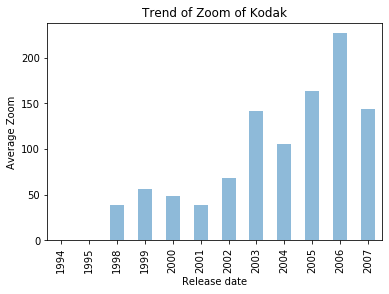

In [17]:
# Trend of Zoom of Kodak
trend_zoom_kodak = cam_kodak.groupby('Release date')['Zoom tele (T)'].mean()
print (trend_zoom_kodak)


# draw bar plot
trend_zoom_kodak.plot.bar(alpha=0.5)
plt.ylabel('Average Zoom')
plt.title('Trend of Zoom of Kodak')

Release date
1996    320.000000
1997    245.000000
1998    386.666667
1999    353.333333
2000    481.300000
2001    364.000000
2002    327.500000
2003    340.555556
2004    296.384615
2005    231.789474
2006    222.800000
2007    236.850000
Name: Weight (inc. batteries), dtype: float64


Text(0.5, 1.0, 'Trend of Weight of Olympus')

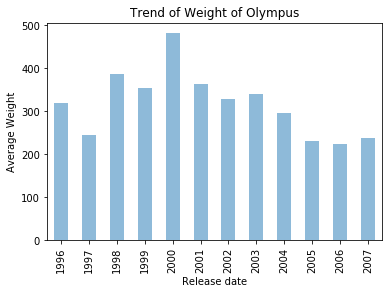

In [18]:
# Trend of Weight of Olympus
trend_weight_olymp = cam_olymp.groupby('Release date')['Weight (inc. batteries)'].mean()
print (trend_weight_olymp)


# draw bar plot
trend_weight_olymp.plot.bar(alpha=0.5)
plt.ylabel('Average Weight')
plt.title('Trend of Weight of Olympus')

In [19]:
# Trend of Macro Focus Range of Pentax
trend_mfrange_penta = cam_penta.groupby('Release date')['Macro focus range'].mean()
print trend_mfrange_penta


# draw bar plot
trend_mfrange_penta.plot.bar(alpha=0.5)
plt.ylabel('Average Macro Focus Range')
plt.title('Trend of Macro Focus Range of Pentax')

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(trend_mfrange_penta)? (<ipython-input-19-69a0a1d78d79>, line 3)

Release date
1996     4.000000
1997     3.000000
1998     6.666667
1999    12.000000
2000     9.600000
2001    10.500000
2002    18.000000
2003    17.777778
2004    20.615385
2005    16.684211
2006    15.650000
2007    21.000000
Name: Storage included, dtype: float64


Text(0.5, 1.0, 'Trend of Storage of Olympus')

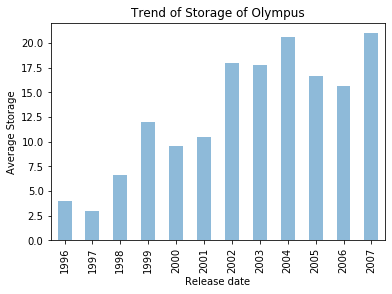

In [21]:
# Trend of Storage of Olympus
trend_storage_olymp = cam_olymp.groupby('Release date')['Storage included'].mean()
print (trend_storage_olymp)


# draw bar plot
trend_storage_olymp.plot.bar(alpha=0.5)
plt.ylabel('Average Storage')
plt.title('Trend of Storage of Olympus')

**Observation:** the storage included increased, the weight of batteries decreased. Some properties of cameras were becoming better over time.

#### Data analysis for all companies 

Release date
1994     0.000000
1995     0.000000
1996     3.250000
1997     2.428571
1998     4.851852
1999     7.404762
2000    10.735849
2001    11.394366
2002    16.607595
2003    16.000000
2004    18.684211
2005    20.366197
2006    18.317241
2007    28.425926
Name: Storage included, dtype: float64


Text(0.5, 1.0, 'Trend of Storage')

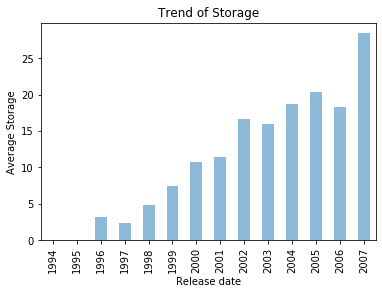

In [23]:
# Trend of Storage for entire dataset
trend_storage = camera.groupby('Release date')['Storage included'].mean()
print (trend_storage)


# draw bar plot
trend_storage.plot.bar(alpha=0.5)
plt.ylabel('Average Storage')
plt.title('Trend of Storage')

Release date
1994    129.000000
1995    129.000000
1996    554.000000
1997    453.285714
1998    422.222222
1999    371.738095
2000    513.660377
2001    706.535211
2002    519.810127
2003    389.091954
2004    476.842105
2005    448.507042
2006    361.191781
2007    436.036810
Name: Price, dtype: float64


Text(0.5, 1.0, 'Trend of Price')

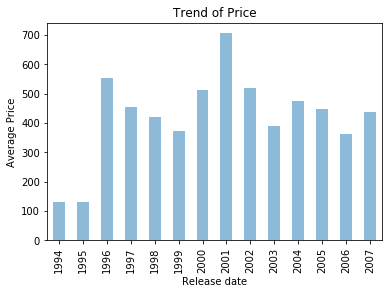

In [27]:
# Trend of Pricefor entire dataset
trend_price = camera.groupby('Release date')['Price'].mean()
print (trend_price)


# draw bar plot
trend_price.plot.bar(alpha=0.5)
plt.ylabel('Average Price')
plt.title('Trend of Price')

Release date
1994    170.000000
1995    170.000000
1996    153.000000
1997    108.714286
1998    131.851852
1999    124.642857
2000    111.320755
2001    117.528169
2002    107.632911
2003    103.109195
2004    101.984962
2005    100.795775
2006    101.510345
2007     99.953704
Name: Dimensions, dtype: float64


Text(0.5, 1.0, 'Trend of Dimensions')

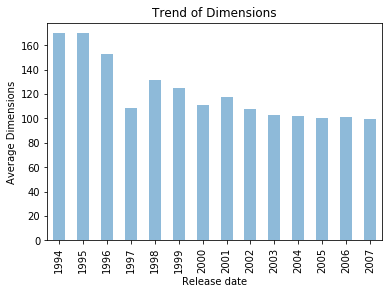

In [28]:
# Trend of Dimensionfor entire dataset
trend_dim = camera.groupby('Release date')['Dimensions'].mean()
print (trend_dim)


# draw bar plot
trend_dim.plot.bar(alpha=0.5)
plt.ylabel('Average Dimensions')
plt.title('Trend of Dimensions')

Release date
1994    1.000000
1995    6.000000
1996    0.000000
1997    0.285714
1998    0.888889
1999    1.261905
2000    1.811321
2001    2.056338
2002    2.696203
2003    3.471264
2004    4.661654
2005    5.528169
2006    6.684932
2007    8.061350
Name: Effective pixels, dtype: float64


Text(0.5, 1.0, 'Trend of Effective Pixels')

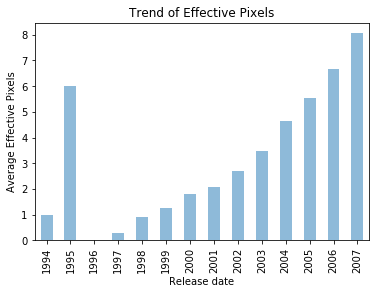

In [30]:
# Trend of Effective Pixel for entire dataset
trend_effPix = camera.groupby('Release date')['Effective pixels'].mean()
print (trend_effPix)


# draw bar plot
trend_effPix.plot.bar(alpha=0.5)
plt.ylabel('Average Effective Pixels')
plt.title('Trend of Effective Pixels')

**Observation:** some properties of cameras were becoming better over time.

#### Comparisons among different companies 

Company Code
1     115
2      63
3      99
4      46
5     102
6      90
7     122
8      55
9      68
10     26
11     54
12    116
dtype: int64


Text(0.5, 1.0, 'Produce of Each Campany')

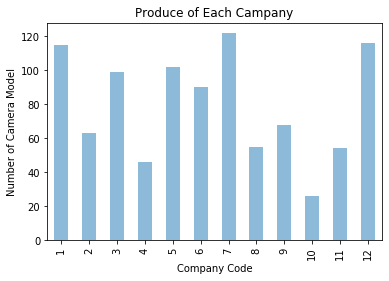

In [31]:
# Number of Camera Models - Group by company
num_cam_camp = camera.groupby('Company Code').size()
print (num_cam_camp)


# draw bar plot
num_cam_camp.plot.bar(alpha=0.5)
plt.ylabel('Number of Camera Model')
plt.title('Produce of Each Campany')

**Observation:** the companies with codes 1,7 and 12 had relatively high produce.

#### Check the produce of some years

Company Code
1     19
2      8
3     13
4      7
5     13
6     18
7     20
8     15
9     10
10     3
11    21
12    16
dtype: int64


Text(0.5, 1.0, 'Produce of Each Campany in 2007')

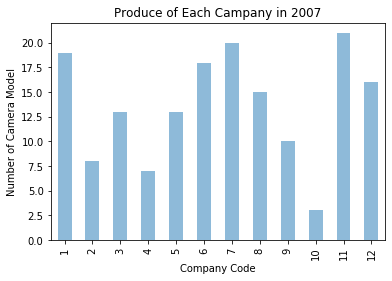

In [41]:
# get the data of 2007
cam_2007 = camera[ camera['Release date'] == 2007 ].copy()

# group by company (code)
num_cam_2007 = cam_2007.groupby('Company Code').size()
print (num_cam_2007)


# draw bar plot
num_cam_2007.plot.bar(alpha=0.5)
plt.ylabel('Number of Camera Model')
plt.title('Produce of Each Campany in 2007')

#### Check other properties for different companies.

Company Code
1     2623.026087
2     2364.444444
3     2559.343434
4     2317.347826
5     2369.794118
6     2649.777778
7     2450.950820
8     2705.454545
9     2659.058824
10    2494.769231
11    2815.462963
12    2303.637931
Name: Max resolution, dtype: float64


Text(0.5, 1.0, 'Max Resolution of Each Campany')

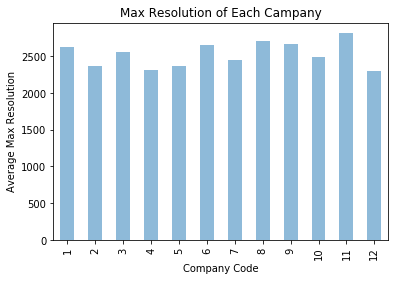

In [47]:
# Max Resolution - Group by company
cam_maxr_camp = camera.groupby('Company Code')['Max resolution'].mean()
print (cam_maxr_camp)


# draw bar plot
cam_maxr_camp.plot.bar(alpha=0.5)
plt.ylabel('Average Max Resolution')
plt.title('Max Resolution of Each Campany')

Company Code
1     1964.000000
2     1824.000000
3     2057.142857
4     1520.000000
5     1720.000000
6     2048.000000
7     1711.200000
9     1600.000000
10    1872.000000
12    1644.800000
Name: Max resolution, dtype: float64


Text(0.5, 1.0, 'Max Resolution of Each Campany in 2000')

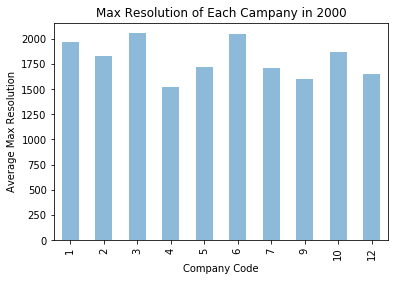

In [48]:
# get the data of 2000
cam_2000 = camera[ camera['Release date'] == 2000 ]

# group by company and get the max resolution
num_cam_2000 = cam_2000.groupby('Company Code')['Max resolution'].mean()
print (num_cam_2000)


# draw bar plot
num_cam_2000.plot.bar(alpha=0.5)
plt.ylabel('Average Max Resolution')
plt.title('Max Resolution of Each Campany in 2000')

Company Code
1     682.086957
2     270.269841
3     297.383838
4     179.000000
5     130.598039
6     618.000000
7     639.000000
8     907.181818
9     279.000000
10    603.153846
11    209.370370
12    517.103448
Name: Price, dtype: float64


Text(0.5, 1.0, 'Price of Each Campany')

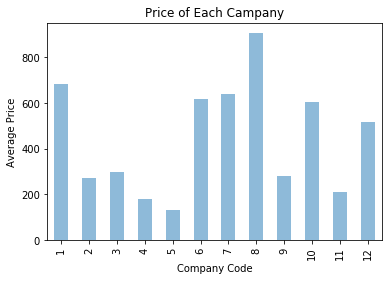

In [50]:
# group by company and get the price
p_camera = camera.groupby('Company Code')['Price'].mean()
print (p_camera)


# draw bar plot
p_camera.plot.bar(alpha=0.5)
plt.ylabel('Average Price')
plt.title('Price of Each Campany')

Company Code
1     17.417391
2      9.571429
3     18.272727
4     19.181818
5     20.372549
6     12.855556
7     15.811475
8     17.618182
9     13.588235
10    17.769231
11    40.444444
12    19.224138
Name: Storage included, dtype: float64


Text(0.5, 1.0, 'Storage of Each Campany')

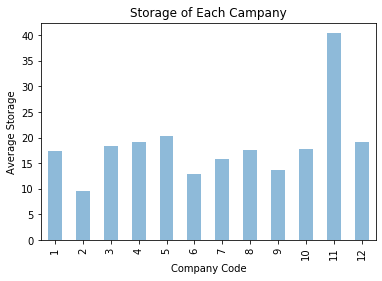

In [52]:
# group by company and get the storage 
store_camera = camera.groupby('Company Code')['Storage included'].mean()
print (store_camera)


# draw bar plot
store_camera.plot.bar(alpha=0.5)
plt.ylabel('Average Storage')
plt.title('Storage of Each Campany')

Company Code
1     20.210526
2     11.000000
3     19.307692
4     26.666667
5     30.000000
6     20.555556
7     21.000000
8     23.333333
9     14.900000
10    34.666667
11    68.761905
12    30.937500
Name: Storage included, dtype: float64


Text(0.5, 1.0, 'Storage of Each Campany in 2007')

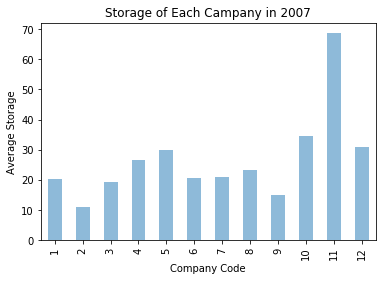

In [54]:
# get the data of 2007
cam_2007 = camera[ camera['Release date'] == 2007 ]

# group by company and get storage
store_cam_2000 = cam_2007.groupby('Company Code')['Storage included'].mean()
print (store_cam_2000)


# draw bar plot
store_cam_2000.plot.bar(alpha=0.5)
plt.ylabel('Average Storage')
plt.title('Storage of Each Campany in 2007')

**Observation**: different companies may have advantages on some properties, for example, one of the advantages of the company with code 11 (Samsung) is the storage included. 